In [ ]:
# pip uninstall -y gensim

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Supervized learning with word2vec and wikipedia
        </h1>
    </div>
</div>

- **[Preprocessing](#pre)**

- **[GridSearch](#gri)**

- **[Resultat](#re)**

- **[Resultat par modeles](#mo)**


Dans ce notebook , nous allons utiliser wor2vec et la vocab wikipedia entrainer sur notre vocabulaire, que nous allons tester dans un gridsearch

In [25]:
from google.colab import drive
drive.mount('/content/ShardDrives/', force_remount=True)

Mounted at /content/ShardDrives/


In [ ]:
# pip install  gensim===3.2.1

In [ ]:
# pip uninstall pyLDAvis

In [ ]:
# pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install --user

In [1]:
# Import Python libraries
import os
import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import re
import unicodedata
from bs4 import BeautifulSoup
# from langdetect import detect
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

from IPython.core.display import display, HTML
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import timeit
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, recall_score,precision_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import HistGradientBoostingClassifier, RandomTreesEmbedding, VotingClassifier,StackingClassifier
import joblib

In [2]:
from sklearn.multioutput import ClassifierChain,MultiOutputRegressor,MultiOutputClassifier,RegressorChain
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor, ElasticNet,RidgeClassifier
from sklearn.svm import LinearSVC
from scipy.stats import reciprocal, uniform

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)

In [4]:

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
# !python -m pip install -U gensim

In [5]:
# import utils own functions
import importlib
import utils
importlib.reload(utils)

<module 'utils' from '/media/ismail/Elements/formation/projet5/utils.py'>

In [ ]:
# pip install  gensim===4.1.1

In [6]:
data = pd.read_csv("stackoverflow_cleaned.csv",sep=";", index_col=0,
                               converters={
                                   "tags": literal_eval,
                                   "text": literal_eval
                               }
                  )
data.head()

,tags,full_text,text,score
Id,,,,
5767325,"[javascript, arrays]",How can I remove a specific item from an array? I have an array of numbers and I'm using the method to add elements to it.\nIs there a simple way to remove a specific element from an array?\nI'm looking for the equivalent of something like:\n\nI have to use core JavaScript. Frameworks are not allowed.\n,"[item, array, array, number, method, element, way, element, array, equivalent, something, core, javascript, framework]",10385
7244321,[git],"How do I update or sync a forked repository on GitHub? I forked a project, applied several fixes and created a pull request which was accepted. A few days later, another change was made by another contributor. So my fork doesn't contain that change.\nHow can I get that change into my fork? Do I need to delete and re-create my fork when I have further changes to contribute? Or is there an update button?\n","[repository, github, project, fix, pull, request, day, change, contributor, fork, change, change, fork, fork, change, update, button]",4359
8710619,[java],"Why don't Java's +=, -=, *=, /= compound assignment operators require casting? Until today, I thought that for example:\n\nWas just a shortcut for:\n\nBut if we try this:\n\nThen will not compile but will compile fine.\nDoes it mean that in fact is a shortcut for something like this\n?\n","[java, compound, assignment, operator, today, example, shortcut, fact, shortcut, something]",3779
6245570,[git],"How to get the current branch name in Git? I'm from a Subversion background and, when I had a branch, I knew what I was working on with ""These working files point to this branch"".\nBut with Git I'm not sure when I am editing a file in NetBeans or Notepad++, whether it's tied to the master or another branch.\nThere's no problem with in bash, it tells me what I'm doing.\n","[branch, name, git, subversion, background, branch, file, point, branch, git, file, netbeans, master, branch, problem, bash]",3372
8467424,[bash],"Echo newline in Bash prints literal \n In Bash, tried this:\n\nBut it doesn't print a newline, only . How can I make it print the newline?\nI'm using Ubuntu 11.04 (Natty Narwhal).\n","[echo, newline, bash, print, bash, newline, newline, ubuntu, natty, narwhal]",3050


In [20]:
data['tags'].str.join(',').count()

93701

In [24]:
data[data['tags'].str.len()>3]

,tags,full_text,text,score
Id,,,,
6319146,"[c++, multithreading, c++11, language-lawyer]","C++11 introduced a standardized memory model. What does it mean? And how is it going to affect C++ programming? C++11 introduced a standardized memory model, but what exactly does that mean? And how is it going to affect C++ programming?\nThis article (by Gavin Clarke who quotes Herb Sutter) says that,\n\nThe memory model means that C++ code\n now has a standardized library to call\n regardless of who made the compiler\n and on what platform it's running.\n There's a standard way to control how\n different threads talk to the\n processor's memory.\n""When you are talking about splitting\n [code] across different cores that's\n in the standard, we are talking about\n the memory model. We are going to\n optimize it without breaking the\n following assumptions people are going\n to make in the code,"" Sutter said.\n\nWell, I can memorize this and similar paragraphs available online (as I've had my own memory model since birth :P) and can even post as an answer to questions asked by others, but to be honest, I don't exactly understand this.\nC++ programmers used to develop multi-threaded applications even before, so how does it matter if it's POSIX threads, or Windows threads, or C++11 threads? What are the benefits? I want to understand the low-level details.\nI also get this feeling that the C++11 memory model is somehow related to C++11 multi-threading support, as I often see these two together. If it is, how exactly? Why should they be related?\nAs I don't know how the internals of multi-threading work, and what memory model means in general, please help me understand these concepts. :-)\n","[c++, memory, model, c++, programming, c++, memory, model, c++, programming, article, gavin, clarke, herb, sutter, memory, model, c++, code, library, compiler, platform, way, thread, processor, memory, code, core, standard, memory, model, assumption, people, code, sutter, paragraph, memory, model, birth, p, answer, question, others, c++, programmer, application, posix, thread, window, thread, c++, thread, benefit, level, detail, feeling, c++, memory, model, c++, support, internals, work, memory, model, concept]",2093
6186770,"[javascript, jquery, asp.net, json]","Ajax request returns 200 OK, but an error event is fired instead of success I have implemented an Ajax request on my website, and I am calling the endpoint from a webpage. It always returns 200 OK, but jQuery executes the error event.\nI tried a lot of things, but I could not figure out the problem. I am adding my code below:\njQuery Code\n\nC# code for \n\nI need the string after successful deletion. I am able to delete the content, but I am not getting this message. Is this correct or am I doing anything wrong? What is the correct way to solve this issue?\n","[ajax, request, error, event, success, ajax, request, website, endpoint, webpage, jquery, error, event, lot, thing, problem, code, jquery, code, c#, code, string, deletion, content, message, anything, way, issue]",880
8840580,"[javascript, css, macos, google-chrome]","Force DOM redraw/refresh on Chrome/Mac Every once in a while, Chrome will render perfectly valid HTML/CSS incorrectly or not at all. Digging in through the DOM inspector is often enough to get it to realize the error of its ways and redraw correctly, so it's provably the case that the markup is good. This happens frequently (and predictably) enough in a project I'm working on that I've put code in place to force a redraw in certain circumstances.\nThis works in most browser/os combinations:\n\nAs in, tweak some unused CSS property, then ask for some information that forces a redraw, then untweak the property. Unfortunately, the bright team behind Chrome for the Mac seem to have found a way to get that offsetHeight without redrawing. Thus killing an otherwise useful hack.\nThus far, the best I've come up with to get the same effect on Chrome/Mac is this piece of ugliness:

<a name='pre'></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Preprocessing 
        </h1>
    </div>
</div>

In [10]:
X = data["text"]
y = data['tags']
multilabel_binarizer = MultiLabelBinarizer()
y_encoded = multilabel_binarizer.fit_transform(y)

X_train, X_test, y_train , y_test = train_test_split(X , y_encoded, test_size = 0.2, random_state= 0)

In [12]:
joblib.dump(multilabel_binarizer,'modeles/multilabel_binarizer_w2v.pkl')

['modeles/multilabel_binarizer_w2v.pkl']

recuperation de la vocab wikipedia

In [72]:
from gensim.models import Word2Vec, Phrases, phrases, KeyedVectors
wikipedia_wv = KeyedVectors.load_word2vec_format('/content/ShardDrives/MyDrive/nlp/glove-wiki-gigaword-200.gz')

In [82]:
import multiprocessing
from gensim.models import Word2Vec

model = Word2Vec(
                X_train, 
                vector_size=200, 
                window=20,
                min_count=5, 
                sample=6e-5, 
                alpha=0.03, 
                min_alpha=0.0007, 
                negative=20,                          
                workers=7)


model.corpus_count

74960

In [83]:
model.epochs

5

In [84]:
training_examples_count = model.corpus_count

In [85]:
model.wv.vectors_lockf = np.ones(len(model.wv))

recuperation de la vocb wiki et intersection avec la notre

In [87]:
model.build_vocab([wikipedia_wv.key_to_index], update=True)
model.wv.intersect_word2vec_format('/content/ShardDrives/MyDrive/nlp/glove-wiki-gigaword-200.gz', lockf=1.0)

In [88]:
model.wv.most_similar(positive=["linux"])

[('freebsd', 0.7041685581207275),
 ('ubuntu', 0.6877003312110901),
 ('unix', 0.6825445294380188),
 ('os', 0.6773467659950256),
 ('solaris', 0.6176007986068726),
 ('kernel', 0.6159353256225586),
 ('debian', 0.6094202399253845),
 ('bsd', 0.6056253910064697),
 ('desktop', 0.5965209007263184),
 ('xp', 0.5914496779441833)]

In [89]:
model.wv.most_similar(positive=["java"])

[('applet', 0.5239233374595642),
 ('api', 0.4868476092815399),
 ('software', 0.47243720293045044),
 ('runtime', 0.47024497389793396),
 ('c++', 0.4692453145980835),
 ('javascript', 0.4691661596298218),
 ('interface', 0.45394524931907654),
 ('php', 0.4476061761379242),
 ('servlets', 0.4452100694179535),
 ('jvm', 0.4354919195175171)]

In [90]:
model.train(X_train,total_examples=training_examples_count, epochs=model.epochs)

(4374613, 11387685)

In [91]:
model.wv.most_similar(positive=["linux"])

[('syscalls', 0.6322189569473267),
 ('syscall', 0.6133660078048706),
 ('operating', 0.5511118769645691),
 ('strace', 0.5503281950950623),
 ('mint', 0.5482781529426575),
 ('libc', 0.5452896356582642),
 ('kernel', 0.5356263518333435),
 ('redhat', 0.5066156983375549),
 ('machine', 0.5056803822517395),
 ('window', 0.5031437873840332)]

In [92]:
model.wv.most_similar(positive=["java"])

[('applet', 0.5239233374595642),
 ('api', 0.4868476092815399),
 ('software', 0.47243720293045044),
 ('runtime', 0.47024497389793396),
 ('interface', 0.45394524931907654),
 ('php', 0.4476061761379242),
 ('servlets', 0.4452100694179535),
 ('browser', 0.4351891577243805),
 ('server', 0.43295666575431824),
 ('functionality', 0.4297446608543396)]

In [93]:
model.save('/content/ShardDrives/MyDrive/nlp/w2v_wiki/stackOverflow_word2vec.bin')

### Pour chaque phrase, on fait la somme des vecteurs associés aux mots qui la composent ou pas si le mot n’est pas dans le vocabulaire

In [94]:
import numpy

def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return numpy.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = numpy.vstack([sum_vectors(p, model) for p in X])
    return feats

X_train = word2vec_features(X_train, model)
X_train.shape

(74960, 200)

In [95]:
X_test = word2vec_features(X_test, model)
X_test.shape

(18741, 200)

test sur un modele

In [99]:
def getMetrics(model,name,X_test, y_test):
    frames=[]
    frame = pd.DataFrame()
    y_pred = model.predict(X_test) 
    frame['estimator'] = [name]  
    frame['accuracy'] = np.round((accuracy_score(y_test, y_pred)), 5)
    frame['f1_macro'] = np.round(f1_score(y_test, y_pred, average="macro"), 3)
    frame['f1_micro'] = np.round(f1_score(y_test, y_pred, average="micro"), 3)
    frame['jaccard'] = np.round(jaccard_score(y_test, y_pred, average="weighted"), 3)
    frame['recall'] = np.round(recall_score(y_test, y_pred, average="weighted"), 3)
    frame['precision'] = np.round(precision_score(y_test, y_pred, average="weighted"), 3)                            
    frames.append(frame)
    return pd.concat(frames) 

In [100]:
logisticWv =  Pipeline([
    #with word to vector (vec size 300)
    ('std',StandardScaler()),
    ('test',OneVsRestClassifier(LogisticRegression(max_iter=1000))), 
])
logisticWv.fit(X_train[0:30000], y_train[0:30000])
# logisticWv.fit(X_train, y_train)
getMetrics(logisticWv,'logisticWv',X_test, y_test)

,estimator,accuracy,f1_macro,f1_micro,jaccard,recall,precision
0,logisticWv,0.30895,0.472,0.57,0.402,0.452,0.739


In [101]:
multilabel_binarizer.classes_

array(['.net', 'algorithm', 'android', 'angular', 'angularjs', 'arrays',
       'asp.net', 'bash', 'c', 'c#', 'c++', 'c++11', 'css', 'gcc', 'git',
       'google-chrome', 'haskell', 'html', 'ios', 'iphone', 'java',
       'java-8', 'javascript', 'jquery', 'json', 'language-lawyer',
       'linux', 'macos', 'multithreading', 'mysql', 'node.js',
       'objective-c', 'performance', 'php', 'pointers', 'python',
       'python-3.x', 'r', 'reactjs', 'regex', 'ruby', 'ruby-on-rails',
       'sql', 'sql-server', 'string', 'swift', 'typescript',
       'visual-studio', 'windows', 'xcode'], dtype=object)

In [102]:
X.shape , y.shape

((93701,), (93701,))

<a name='gri'></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          gridsearch
        </h1>
    </div>
</div>


In [103]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import RidgeCV
from sklearn import linear_model

class nlpEstimatorAlgo:

    
    def __init__(self, models, params,useLog=True):
        self.models = models
        self.keys = models.keys()
        self.params = params
        self.grid_searches = {}
        self.useLog = useLog
        self.bestParams = {}
        self.scorer = {}
        self.cv_results = {}
        self.scoring = {
                        "accuracy" : "accuracy",
                        "f1" : "f1", 
                        "jaccard" : "jaccard",
                        "recall" : "recall",
                        "precision":"precision"
                        }
#         self.kfold = KFold(n_splits=5, random_state=0) 
        self.kfold = KFold(n_splits=5) 
#         self.kfold = StratifiedKFold(n_splits=5)
       
    
    def fit(self, X_train, y_train):
        print('shape training set {}'.format(X_train.shape))
        starttotaltime = timeit.default_timer()
        for model_name in self.keys:
            print('Running GridSearchCV for %s.' % model_name)     
            starttime = timeit.default_timer()
            model = self.models[model_name]
            params = self.params[model_name]
            print('training model',model)  
            #GridSearchCV
            #RandomizedSearchCV
            pipeline =  Pipeline([
                ('std',StandardScaler()),
                (model_name,OneVsRestClassifier(model)), 
            ])
            
            grid_search = GridSearchCV(
                                    pipeline, 
                                    params,  
                                    # n_iter = 5,                                  
                                    # scoring = self.scoring,
                                    # scoring = "f1_weighted",
                                    scoring = {
                                                "f1_weighted" : "f1_weighted", 
                                                "accuracy" : "accuracy",
                                                },
                                    return_train_score = True,
                                    # refit=True,
                                    refit="f1_weighted",
                                    cv = self.kfold,
                                    n_jobs=-1,
                                    
                                    )


#             print(grid_search.get_params().keys())
            grid_search.fit(X_train, y_train)
            self.bestParams[model_name] = grid_search.best_params_
            self.scorer[model_name] = grid_search.best_estimator_
            self.grid_searches[model_name] = grid_search
            self.cv_results[model_name] = grid_search.cv_results_
            
            
            elapsed = timeit.default_timer() - starttime
            print('training {} model done'.format(model_name))
            print("elapsed time {:.2f}s".format(elapsed))
        print('All training done.')
        elapsed = timeit.default_timer() - starttotaltime
        print("total time {:.2f}s".format(elapsed))
        
        
    def getBestParams(self):
        return self.bestParams
    
    def showBestParams(self,useindex=False):
        frames =[]
        result = pd.DataFrame()
        for name, bestParams in self.bestParams.items():      
            frame = pd.DataFrame()
            frame['estimator'] = [name]  
            frame['best_params'] = [bestParams]
            frames.append(frame)
        result = pd.concat(frames) 
        result = result.reset_index()
        if(useindex):
            result.set_index('estimator', inplace=True)
        result = result.drop([ 'index'], 1)
        return result     
    
    def getGetScorer(self):
        return self.scorer 
    
    def getCvResults(self):
        return sel.cv_results_
    
    def getPredictionsResult(self, name, X_test):
      # Predict
      result = pd.DataFrame()
      y_test_predicted_labels = self.grid_searches[name].predict(X_test)
      result['True_Tag'] = multilabel_binarizer.inverse_transform(y_test)
      result['predicted_Tag'] = multilabel_binarizer.inverse_transform(y_test_predicted_labels)
      return result

    def getUnTaggedPredictionsByModel(self, X_test):
      frames =[]
      result = pd.DataFrame()
      for name, grid_search in self.grid_searches.items():  
        frame = pd.DataFrame()
        y_test_predicted_labels = grid_search.predict(X_test)
        tags_per_row = y_test_predicted_labels.sum(axis=1)
        null_rate = round(((tags_per_row.size - np.count_nonzero(tags_per_row))/tags_per_row.size)*100,2)
        frame['estimator'] = [name]  
        frame['untaged'] = str(null_rate) +'%'
        frames.append(frame)
      result = pd.concat(frames)   
      return result
    
    def getClassificationReport(self,name, y_test, X_test):                
        y_test_predicted_labels = self.grid_searches[name].predict(X_test)                
        print('accuracy model {} : {}'.format(name, accuracy_score(y_test_predicted_labels, y_test)))                
        report_dict = classification_report(y_test, y_test_predicted_labels, output_dict=True, target_names=multilabel_binarizer.classes_)
        return pd.DataFrame(report_dict).T

    def savemodels(self):
      joblib.dump(multilabel_binarizer,'/content/ShardDrives/MyDrive/nlp/w2v_wiki/w2v_multilabel_binarizer.pkl')

      for name, grid_search in self.grid_searches.items():  
        joblib.dump(grid_search,'/content/ShardDrives/MyDrive/nlp/w2v_wiki/'+name+'-w2v_wiki.pkl')

     #renvoie les meilleurs resulats par modele contenu tester sur les variables test
    def getBestModeleScore_scorePrediction(self, useIndex=True):
        frames =[]
        result = pd.DataFrame()
        for name, grid_search in self.grid_searches.items():      
            frame = pd.DataFrame()
            #grid_search.predict(X_test) is equivalent to grid_search.best_estimator_.predict(X_test)
            # Inverse transform
            y_pred = grid_search.predict(X_test) 
            frame['estimator'] = [name]  
            frame['accuracy'] = np.round((accuracy_score(y_test, y_pred)), 5)
            frame['f1_macro'] = np.round(f1_score(y_test, y_pred, average="macro"), 3)
            frame['f1_micro'] = np.round(f1_score(y_test, y_pred, average="micro"), 3)
            frame['jaccard'] = np.round(jaccard_score(y_test, y_pred, average="weighted"), 3)
            frame['recall'] = np.round(recall_score(y_test, y_pred, average="weighted"), 3)
            frame['precision'] = np.round(precision_score(y_test, y_pred, average="weighted"), 3)                            
            frames.append(frame)
        result = pd.concat(frames) 
        result = result.reset_index()
        if(useIndex is True):
          result.set_index('estimator', inplace=True)
        result = result.drop([ 'index'], 1)
        return result  
    
    #affiche les meilleurs resulats par modele contenu tester sur les variables test
    def getBestModeleScore_graphpredictions(self,X_test):          
        plt.rcParams['font.size'] = '10'
        ax = self.getBestModeleScore_scorePrediction(True).plot(kind='bar',figsize=(15,6)) 
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

        plt.legend(loc=2)
        plt.title('Resultats des meilleurs predictions par modeles apres hyperparametrisations')
        plt.show()      
    
#     Generate 3 plots: the test and training learning curve, the training
#     samples vs fit times curve, the fit times vs score curve.
    def getLearningCurveByName(self,model_name,X_train,y_train):
        ## Results from grid search
        grid = self.grid_searches[model_name]
        title = "learning curve for model {}".format(model_name)
        estimator = grid.best_estimator_
        estimator = grid.best_estimator_
        utils.plot_learning_curve(
            estimator, title, X_train, y_train,ylim=None, cv=self.kfold, n_jobs=4
        )        
        plt.show()    
        
    #Show validation between real values vs predicted values        
    def showPredictionbyName(self,name,target,X_train,y_train):
        plot_cross_val_predi(self.grid_searches[name].best_estimator_, name, target, X_train, y_train, cv=self.kfold)          

    
models = {   
        'SGDClassifier':SGDClassifier(),
        'logistic': LogisticRegression(),
        'randomForest': RandomForestClassifier(),
        'RidgeClassifier' : RidgeClassifier(),

}

params_models = {

            'SGDClassifier':{
                'SGDClassifier__estimator__max_iter': [1000], # number of epochs
                'SGDClassifier__estimator__loss': ['log'], # logistic regression,
                'SGDClassifier__estimator__penalty': ['l1','l2'],
                'SGDClassifier__estimator__n_jobs': [-1]
                },

            'logistic': 
                            {
                              "logistic__estimator__C": [10, 1.0, 0.1],
                              "logistic__estimator__penalty": ["none", "l2"],
                              "logistic__estimator__dual": [False],
                            },
            'randomForest' :{
                              "randomForest__estimator__max_depth": [5, 25, 50],
                              "randomForest__estimator__min_samples_leaf": [1, 5, 10],
                              "randomForest__estimator__class_weight": ["balanced"]
                             },  
    
            'RidgeClassifier': {                
                        'RidgeClassifier__estimator__max_iter': [1500,2000,3000],
                        'RidgeClassifier__estimator__alpha': np.arange(0.1, 1, .2).tolist(),        
                        'RidgeClassifier__estimator__solver' :['auto', 'cholesky']
                    },   

        
               
}     

algo_estimator = nlpEstimatorAlgo(models, params_models,True)
algo_estimator.fit(X_train[0:30000],y_train[0:30000])

shape training set (30000, 200)
Running GridSearchCV for SGDClassifier.
training model SGDClassifier()
training SGDClassifier model done
elapsed time 1148.86s
Running GridSearchCV for logistic.
training model LogisticRegression()
training logistic model done
elapsed time 185.18s
Running GridSearchCV for randomForest.
training model RandomForestClassifier()
training randomForest model done
elapsed time 3491.20s
Running GridSearchCV for RidgeClassifier.
training model RidgeClassifier()
training RidgeClassifier model done
elapsed time 79.78s
All training done.
total time 4905.03s


<a name='re'></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          resultat
        </h1>
    </div>
</div>

Malheuresement les resultats sont moins bon que notre modele word2vec seul

In [104]:
algo_estimator.getBestModeleScore_scorePrediction(X_test)

,estimator,accuracy,f1_macro,f1_micro,jaccard,recall,precision
0,SGDClassifier,0.28846,0.477,0.567,0.410,0.512,0.638
1,logistic,0.30959,0.474,0.571,0.403,0.456,0.736
2,randomForest,0.28051,0.482,0.571,0.406,0.511,0.673
3,RidgeClassifier,0.12993,0.138,0.292,0.169,0.177,0.746


In [105]:
algo_estimator.savemodels()

In [106]:
algo_estimator.getBestModeleScore_scorePrediction().to_csv("/content/ShardDrives/MyDrive/nlp/w2v_wiki/w2v_wiki_models_resutls.csv")

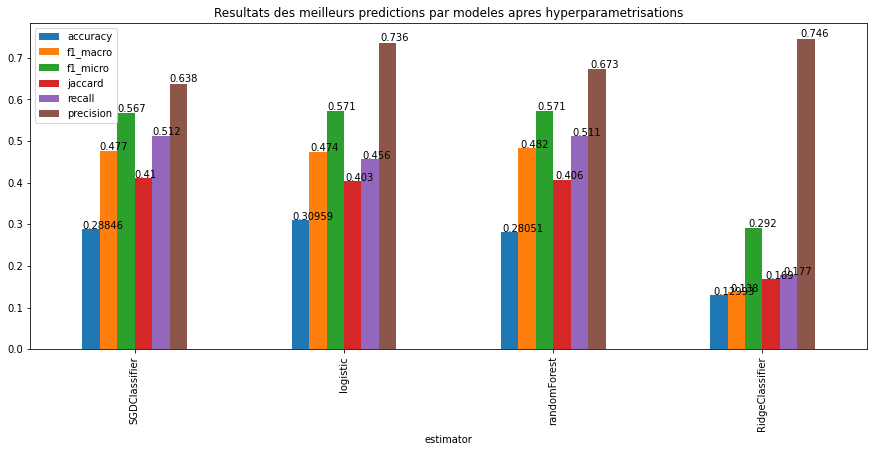

In [107]:
algo_estimator.getBestModeleScore_graphpredictions(X_test)

In [108]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [109]:
algo_estimator.showBestParams()

,estimator,best_params
0,SGDClassifier,"{'SGDClassifier__estimator__loss': 'log', 'SGDClassifier__estimator__max_iter': 1000, 'SGDClassifier__estimator__n_jobs': -1, 'SGDClassifier__estimator__penalty': 'l1'}"
1,logistic,"{'logistic__estimator__C': 10, 'logistic__estimator__dual': False, 'logistic__estimator__penalty': 'l2'}"
2,randomForest,"{'randomForest__estimator__class_weight': 'balanced', 'randomForest__estimator__max_depth': 25, 'randomForest__estimator__min_samples_leaf': 10}"
3,RidgeClassifier,"{'RidgeClassifier__estimator__alpha': 0.1, 'RidgeClassifier__estimator__max_iter': 1500, 'RidgeClassifier__estimator__solver': 'auto'}"


In [110]:
algo_estimator.getUnTaggedPredictionsByModel(X_test)

,estimator,untaged
0,SGDClassifier,24.1%
0,logistic,34.09%
0,randomForest,28.68%
0,RidgeClassifier,72.61%


<a name='mo'></a>

<div class="bg-primary text-lg-left text-white">
    <div >
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          Resultat par modeles
        </h1>
    </div>
</div>

Dans cette partie nous allons analyser plus en detail chaque modele.

- La prediction de tag realiser par le modele vs tag reel
    
- la learning curve du modele (si il y a Under/Over fitting)
    
-  ainsi que la classification report par tag
    

,True_Tag,predicted_Tag
15729,"(swift,)","(string,)"
3493,"(arrays, python)","(python,)"
7244,"(python,)","(python,)"
15666,"(algorithm, c++)",()
13236,"(c++, visual-studio)","(c++, visual-studio)"
6757,"(objective-c, swift)","(swift,)"
7751,"(javascript, typescript)","(c#,)"
11853,"(c++, c++11)",()
3317,"(git,)","(git,)"
11246,"(python,)","(python,)"


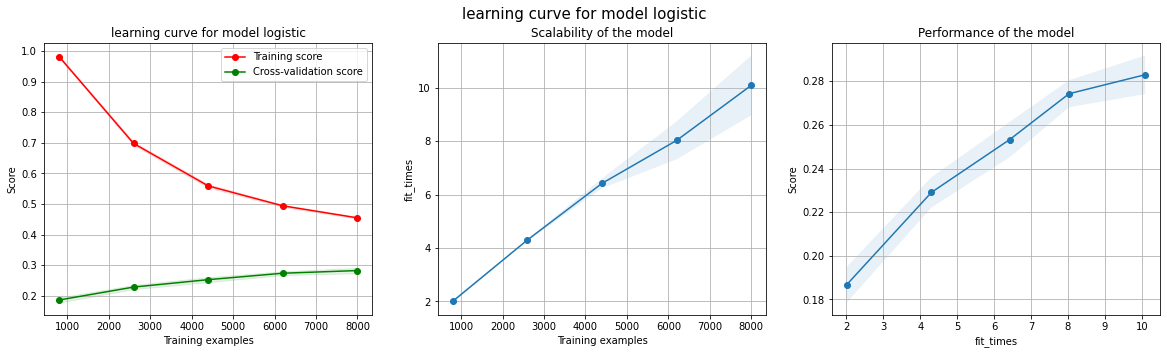

accuracy model logistic : 0.309588602529214


,precision,recall,f1-score,support
.net,0.442623,0.091062,0.151049,593.0
algorithm,0.717033,0.486034,0.579356,537.0
android,0.923006,0.737729,0.820033,1365.0
angular,0.700000,0.396761,0.506460,247.0
angularjs,0.759615,0.385366,0.511327,205.0
arrays,0.593607,0.296804,0.395738,438.0
asp.net,0.394366,0.132075,0.197880,212.0
bash,0.718182,0.456647,0.558304,173.0
c,0.713584,0.357084,0.475983,1221.0
c#,0.804100,0.494398,0.612316,2142.0


In [111]:
display(algo_estimator.getPredictionsResult( "logistic", X_test).sample(10))
algo_estimator.getLearningCurveByName('logistic',X_train[0:10000],y_train[0:10000])
algo_estimator.getClassificationReport("logistic",y_test,X_test)

,True_Tag,predicted_Tag
9817,"(css,)","(css, html)"
3248,"(python,)","(python,)"
6917,"(php,)","(php,)"
13357,"(java, performance)",()
9010,"(java, java-8, language-lawyer)","(java,)"
2838,"(java,)","(java,)"
13424,"(arrays, javascript)","(javascript,)"
1414,"(android,)","(ios,)"
15973,"(c,)","(python,)"
14411,"(c++,)","(c, c++)"


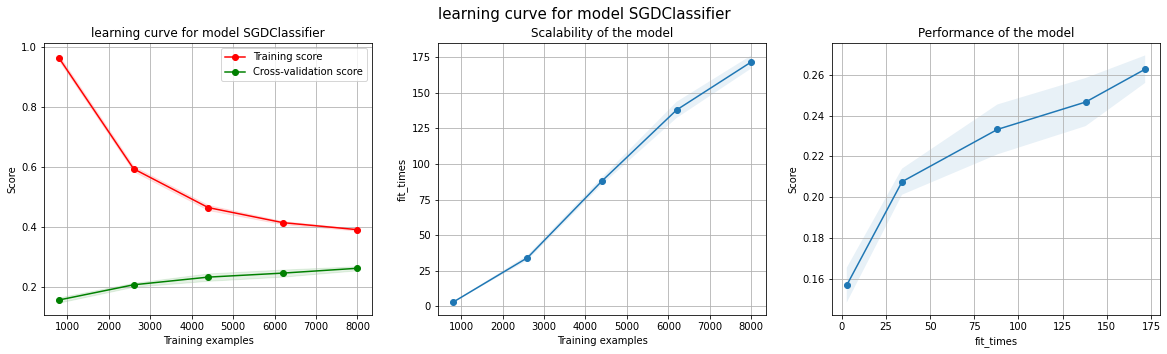

accuracy model SGDClassifier : 0.2884584600608292


,precision,recall,f1-score,support
.net,0.244259,0.197302,0.218284,593.0
algorithm,0.643777,0.558659,0.598205,537.0
android,0.841473,0.769963,0.804132,1365.0
angular,0.517857,0.469636,0.492569,247.0
angularjs,0.532051,0.404878,0.459834,205.0
arrays,0.457895,0.397260,0.425428,438.0
asp.net,0.301676,0.254717,0.276215,212.0
bash,0.556391,0.427746,0.483660,173.0
c,0.576782,0.516790,0.545140,1221.0
c#,0.786978,0.519141,0.625598,2142.0


In [113]:
display(algo_estimator.getPredictionsResult("SGDClassifier", X_test).sample(10))
algo_estimator.getLearningCurveByName('SGDClassifier',X_train[0:10000],y_train[0:10000])
algo_estimator.getClassificationReport("SGDClassifier",y_test,X_test)

In [114]:
# display(algo_estimator.getPredictionsResult("randomForest",X_test).head(10))
# algo_estimator.getLearningCurveByName('randomForest',X_train[0:10000],y_train[0:10000])
# algo_estimator.getClassificationReport("randomForest",y_test,X_test)

,True_Tag,predicted_Tag
1938,"(c#,)",()
863,"(ios, swift)",()
7672,"(macos, objective-c)",()
6628,"(arrays, java)",()
5077,"(c++,)","(c++,)"
2614,"(mysql, sql)",()
13637,"(c++, visual-studio)",()
3937,"(ios, iphone, objective-c)",()
4226,"(algorithm, java)",()
7039,"(bash, json)",()


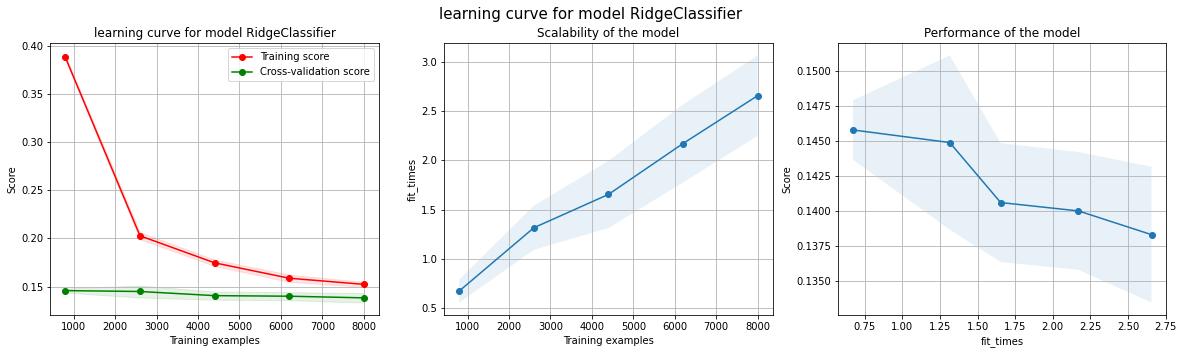

accuracy model RidgeClassifier : 0.12992903260231578


,precision,recall,f1-score,support
.net,0.565217,0.021922,0.042208,593.0
algorithm,0.763158,0.216015,0.336720,537.0
android,0.953043,0.401465,0.564948,1365.0
angular,0.466667,0.028340,0.053435,247.0
angularjs,1.000000,0.043902,0.084112,205.0
arrays,0.352941,0.013699,0.026374,438.0
asp.net,0.333333,0.009434,0.018349,212.0
bash,0.875000,0.040462,0.077348,173.0
c,0.715328,0.080262,0.144330,1221.0
c#,0.805349,0.253035,0.385080,2142.0


In [115]:
display(algo_estimator.getPredictionsResult("RidgeClassifier", X_test).sample(10))
algo_estimator.getLearningCurveByName('RidgeClassifier',X_train[0:10000],y_train[0:10000])
algo_estimator.getClassificationReport("RidgeClassifier",y_test,X_test)

<div class="bg-primary text-lg-left text-white">
    <div>
        <h1 class="text-center" style="padding: 10px 0 10px 0;">
          API disponlible
        </h1>
    </div>

</div>
    <div class="text-lg-left ">
       <a href="https://github.com/ismailazdad/stackoverflowTags" target="_blank">stackoverflow</a>
    </div>
     <div>       
       <a href="http://ismail2233.pythonanywhere.com/" target="_blank">online version</a>
    </div>



In [116]:
from sklearn.metrics import multilabel_confusion_matrix
y_test_predicted_labels = algo_estimator.grid_searches['logistic'].predict(X_test)   
print(multilabel_confusion_matrix(y_test, y_test_predicted_labels))

[[[18080    68]
  [  539    54]]

 [[18101   103]
  [  276   261]]

 [[17292    84]
  [  358  1007]]

 [[18452    42]
  [  149    98]]

 [[18511    25]
  [  126    79]]

 [[18214    89]
  [  308   130]]

 [[18486    43]
  [  184    28]]

 [[18537    31]
  [   94    79]]

 [[17345   175]
  [  785   436]]

 [[16341   258]
  [ 1083  1059]]

 [[15857   297]
  [  893  1694]]

 [[18174    83]
  [  412    72]]

 [[17868   116]
  [  238   519]]

 [[18487    53]
  [  114    87]]

 [[18398    44]
  [   44   255]]

 [[18522    38]
  [  111    70]]

 [[18549    25]
  [   47   120]]

 [[17626   198]
  [  636   281]]

 [[17735   126]
  [  409   471]]

 [[18533    42]
  [  134    32]]

 [[16270   250]
  [ 1209  1012]]

 [[18550    27]
  [  129    35]]

 [[16151   314]
  [ 1203  1073]]

 [[17973    86]
  [  456   226]]

 [[18447    40]
  [  137   117]]

 [[18471    48]
  [  164    58]]

 [[18418    32]
  [  228    63]]

 [[18546    39]
  [   99    57]]

 [[18428    56]
  [  156   101]]

 [[18296    79

Word2vec